# 1. Relative Frequency, Chebyshev's inequality and Chernoff bound

We first need to import the libraries that we are going to use in this notebook.

1. The *numpy* Python library is used for mathematical functions, such as our random number generators;
2. The *matplotlib* Python library is used to plot graphics and visualize data;
3. The *ipywidgets* library, for animations and widgets. 
   

In [1]:
# NOTE: if you are in labs at DEI, open this notebook with jupyter-notebook (NOT jupyter-lab), due to outdated versions.

In [2]:
# Imports widgets for JupyterLite
%pip install -q ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, widgets, fixed
from IPython.display import display

random_seed = 1
np.random.seed(random_seed)

Let's define our Bernoulli variable $X_j$ simulating the flip of the $j$-th coin:

$$
X_j =
\begin{cases}
1 & \text{if H with probability $p$} \\
0 & \text{if T}
\end{cases}
$$

We know that in a Bernoulli random variable we have that:


*   $\mathbb{E} \left[ X_j \right] = p$, and
*   $\mathbb{Var} \left[ X_j \right] = p (1 - p)$.







In [4]:
# -- function that simulates a coin flipping (Bernoulli variable)
#print(np.random.rand())
def coin_flip(p):
  if np.random.rand() < p: # np.random.rand() give us a number betwin 0 and 1
    # HEAD
    return 1
  else:
    # TAIL
    return 0

## Relative Frequency

Of course, we do not know beforehand the coin's probability, but we would like to estimate it based on data observations.

Now, let's try to estimate the probability $p$ by computing the <u>relative frequency</u> simulating the flip of our coin for $n = 10000$ times.

We want to compute and plot the estimated probability for each of such flip:

\begin{equation}
  \tilde{p_i} = \sum_{j=1}^{i} \frac{X_j}{i}
\end{equation}

for $i = 1, ..., n$

Note that $\tilde{p_i}$ is the sample mean computed observing samples up to the $i$-th flip.

In [5]:
# -- let's set our parameters
n_flips = 10000 # number of flips
p = np.random.rand()

In [6]:
def estimate_probability(n_flips, p):

    estimated_p = np.zeros(n_flips) #it creates an array with 10000 zeros
    head_count = 0
    
    for i in range(1, n_flips+1):
        head_count += coin_flip(p)
        # -- relative frequency
        estimated_p[i - 1] = head_count/i
    
    return estimated_p

Now, let's plot the estimated probability for each flip

In [7]:
def plot_estimated_probability(n_flips, p):
    
    # we seed the code in order to obtain the same sequence of flips
    np.random.seed(random_seed)
    estimated_p = estimate_probability(n_flips, p)

    plt.plot(estimated_p, color = 'b', label='Estimated probability')
    
    # plot true value
    plt.axhline(y=p, color='r', linestyle='--', label='True probability')
    plt.ylim(0, 1)
    
    plt.xlabel('Number of flips')
    x_range = range(0, n_flips, max(1, int(n_flips/5)))
    plt.xticks(x_range, labels = [1 + x for x in x_range])
    plt.ylabel('Estimated probability')
    plt.legend()

In [8]:
n_flips_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=n_flips,
    description='n_flips',
    step=1
)

In [9]:
interact(plot_estimated_probability, n_flips = n_flips_slider, p = fixed(p));

interactive(children=(IntSlider(value=1, description='n_flips', max=10000, min=1), Output()), _dom_classes=('w…

## Law of Large Numbers

From the plots above, we can also see the validiy of the Law of Large Numbers, that states:

\begin{equation}
  \lim_{n\to\infty} \mathbb{P} \left[  \big| \frac{1}{n} \sum_{i = 1}^n X_i - \mu \big| > \varepsilon \right] = 0.
\end{equation}

---

In [10]:
## use whiteboard

Next, we want to compute the mean and the variance of our random variable $\tilde{p_n}$, that we recall is defined as:

\begin{equation}
  \tilde{p}_n = \sum_{j = 1}^{n} \frac{X_j}{n}
\end{equation}

So, we have that the expected value at the end of our $n$ flips is:

\begin{align}
  \mathbb{E}\left[\tilde{p}_n\right] &= \mathbb{E} \left[ \sum_{j = 1}^{n} \frac{X_j}{n} \right] = \frac{1}{n} \ \mathbb{E} \left[ \sum_{j = 1}^{n} X_j \right] = \\
  & = \frac{1}{n} \ \sum_{j = 1}^{n} \ \mathbb{E} \left[ X_j \right] = \frac{1}{n} \ \sum_{j = 1}^{n} \ p = p
\end{align}

and the variance is computed as:

\begin{align}
  \mathbb{Var} \left[\tilde{p}_n\right] &= \mathbb{Var} \left[ \sum_{j = 1}^{n} \frac{X_j}{n} \right] = \frac{1}{n^2} \ \mathbb{Var} \left[ \sum_{j = 1}^{n} X_j \right] = \\
  & = \frac{1}{n^2} \ \sum_{j = 1}^{n} \ \mathbb{Var} \left[ X_j \right] = \frac{1}{n^2} \ n \ \mathbb{Var} \left[ X_j \right] = \frac{p (1 - p)}{n}
\end{align}

Let's see if the above is true by computing the empirical mean and variance.

In [11]:
# let's see if the true value of p matches the estimated one
# -- true mean
print('True mean = ', p)

# -- true variance
print('True variance = ', p*(1-p)/n_flips)

# let's recompute the same sequence of n_flips flips
np.random.seed(random_seed)
estimated_p = estimate_probability(n_flips, p)
# -- sample mean

X_mean = sum(estimated_p)/n_flips
print('Sample Mean = ', X_mean)

# -- sample variance
X_var = (sum((estimated_p - X_mean)**2))/(n_flips - 1) # Bessel's correction
print('Sample Variance = ', X_var)

True mean =  0.417022004702574
True variance =  2.4311465229642033e-05
Sample Mean =  0.41263620883862934
Sample Variance =  0.00017689688551273587


## Chebyshev's inequality

As you have seen during the lectures, given a random variable $X$ with $\mathbb{E}\left[X\right] = \mu$ and $\mathbb{Var}\left[X\right] = \sigma^2$, and a fixed constant $\varepsilon > 0 $, the Chebyshev's inequality states:

\begin{equation}
  \mathbb{P}\left[ \left| X - \mu \right| > \varepsilon \right] \leq \frac{\sigma^2}{\varepsilon^2}
\end{equation}

In our example, we want to plot the Chebyshev bounds given by the above inequality for the estimated probability in each of our coin flips.

So, if we let:

  * $X = \tilde{p_i}$
  * $\mu = \mathbb{E}\left[ \tilde{p_i} \right] = p$
  * $\sigma_i^2 = \mathbb{Var}\left[ \tilde{p_i} \right] = \frac{p (1 - p)}{i}$
  * $\varepsilon = \varepsilon\mu$

we obtain:

\begin{equation}
  \mathbb{P}\left[ | \tilde{p_i} - p | > \varepsilon p \right] \leq \frac{p (1 - p)}{i \varepsilon^2 p^2}
\end{equation}



Let's compute and plot the probability bounds of being far from the true mean, for each of our $\tilde{p_i}$ random variables, $i = 1, ..., n$.

Let's fix the right-hand-side of the above inequality, by letting $\delta = \frac{p (1 - p)}{i \varepsilon^2 p^2} = 0.05$, that corresponds to the probability of obtaining "bad" estimates. We need to compute the distance from the mean (i.e., $\varepsilon p$) for each flip $i$, that is:

\begin{equation}
  \varepsilon p = \sqrt{\frac{p(1 - p)}{\delta i}}
\end{equation}

In [12]:
def plot_chebyshev_bounds(delta, estimated_p, n_flips, p):

    flips = np.array([i for i in range(1, n_flips+1)])
    
    
    plt.plot(estimated_p, color = 'b', label='Estimated probability')
    # -- plot true value
    plt.axhline(y = p, color = 'r', linestyle = '--', label='True probability')
    
    # -- Chebyshev's bounds: we compute the p * epsilon for each flip
    chebyshev_values = np.sqrt((p * (1 - p)) / (flips * delta))
    plt.plot(p + chebyshev_values, color = 'g', linestyle='--')
    plt.plot(p - chebyshev_values, color = 'g', linestyle='--', label=f'Chebyshev bounds with delta={round(delta, 3)}')
    plt.ylim(0, 1)
    
    
    plt.xlabel('Number of flips')
    plt.ylabel('Estimated probability')
    plt.legend()

Try with different values of $\delta$, that reflect the probability of optaining good approximation.

In [13]:
delta_slider = widgets.FloatSlider(
    value=0.005,
    min=0.001,
    max=1.0,
    description='delta',
    step=0.005
)

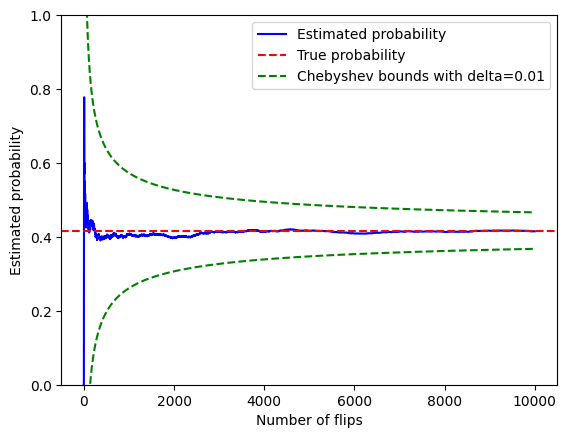

In [14]:
#interact(plot_chebyshev_bounds, delta = delta_slider, estimated_p = fixed(estimated_p), n_flips = fixed(n_flips), p = fixed(p));
delta = 0.01
plot_chebyshev_bounds(delta, estimated_p, n_flips, p)

## Chernoff bound

Now, we are going to analyze a more precise tool for the approximation guarantees: the Chernoff's bound (you will use it in the next lectures).




**Chernoff's bound:**
Given a random variable $X = \sum_{i=1}^n X_i$, written as a sum of Bernoulli random variables $X_i$ with $\mu = \mathbb{E} \left[X \right]$, and a small constant $\varepsilon \in (0, 1)$, we have that:

\begin{equation}
  \mathbb{P}\left[ \left| X - \mu \right| > \varepsilon \mu \right] \leq 2 e^{-\frac{\varepsilon^2 \mu}{3}}
\end{equation}

In our example, we need to rearrange the variables. In particular, we want (as done for the Chebyshev's bounds) to compute the following approximation:

\begin{align}
  & \mathbb{P}\left[ | \tilde{p_i} - p | > \varepsilon p \right] \\
  & = \mathbb{P}\left[ \big | \sum_{j=1}^i \frac{X_j}{i} - p \ \big | > \varepsilon p \right] \\
  & = \mathbb{P}\left[ \big | \sum_{j=1}^i X_j - p \ i \ \big | > \varepsilon p \ i \right] \\
  & \leq 2 e^{-\varepsilon^2 p\ i / 3}
\end{align}

Also in this case, let's fix $\delta = 2 e^{\varepsilon^2 p\ i / 3} = 0.05$, the probability of optaining "bad" estimates.



We can similarly plot the Chernoff's bounds by computing the distances from the true mean (i.e., $\varepsilon p$ as defined in the above) for each coin flip.

In [15]:
def plot_chernoff_bound(delta, estimated_p, n_flips, p):

    flips = np.array([i for i in range(1, n_flips+1)])
    plt.plot(estimated_p, color = 'b', label='Estimated probability')
    # plot true value
    plt.axhline(y = p, color = 'r', linestyle = '--', label='True probability')
    
    plt.ylim(0, 1)
    
    # -- Chernoff's bounds: let's compute the p * epsilon values
    chernoff_values = np.sqrt(((np.log(2/delta)) * 3 * p) / flips)
    plt.plot(p + chernoff_values, color = 'k', linestyle='--')
    plt.plot(p - chernoff_values, color = 'k', linestyle='--', label=f'Chernoff bounds with delta={round(delta, 3)}')
    
    
    plt.xlabel('Number of flips')
    plt.ylabel('Estimated probability')
    plt.legend()

In [16]:
interact(plot_chernoff_bound, delta = delta_slider, estimated_p = fixed(estimated_p), n_flips = fixed(n_flips), p = fixed(p));

interactive(children=(FloatSlider(value=0.005, description='delta', max=1.0, min=0.001, step=0.005), Output())…

Let's compare Chebyshev's and Chernoff's bounds

In [17]:
def plot_chebyshev_and_chernoff_bound(delta, estimated_p, n_flips, p):

    flips = np.array([i for i in range(1, n_flips+1)])

    plt.plot(estimated_p, color = 'b', label='Estimated probability')
    # plot true value
    plt.axhline(y = p, color = 'r', linestyle = '--', label='True probability')
    
    plt.ylim(0, 1)
    
    # -- Chebyshev's bounds
    chebyshev_values = np.sqrt((p * (1 - p)) / (flips * delta))
    plt.plot(p + chebyshev_values, color = 'g', linestyle='--')
    plt.plot(p - chebyshev_values, color = 'g', linestyle='--', label=f'Chebyshev bounds with delta={round(delta, 3)}')
    
    # -- Chernoff's bounds
    chernoff_values = np.sqrt(np.abs((np.log(delta/2)) * p * 3)/flips)
    plt.plot(p + chernoff_values, color = 'k', linestyle='--')
    plt.plot(p - chernoff_values, color = 'k', linestyle='--', label=f'Chernoff bounds with delta={round(delta, 3)}')
    
    
    plt.xlabel('Number of flips')
    plt.ylabel('Estimated probability')
    plt.legend()

In [18]:
interact(plot_chebyshev_and_chernoff_bound, delta = delta_slider, estimated_p = fixed(estimated_p), n_flips = fixed(n_flips), p = fixed(p));

interactive(children=(FloatSlider(value=0.005, description='delta', max=1.0, min=0.001, step=0.005), Output())…

# 2. Coin flipping: a Machine Learning case study

We will now exploit the concepts we have introduced to build a simplified Machine Learning case study starting from simple coin flippings. We will consider a coin $c$ as an hypothesis $h$ belonging to our hypothesis set $H$. Each coin $c$ will have an associated probability error $p^{(c)}$, which, as before, is not known in advance.

Our aim is to find the coin $c^*$ that has the smallest error probability $p^{(c)}$ (over all $c$), i.e., the coin that flips head with the smallest probability.
<br><br>
To do so, we could empirically count the number of heads in a series of $n$ flips. In other words, we are trying to find the coin which **minimizes the number of heads** over such $n$ flips. Let $\tilde{p}_n^{(c)}$ be the estimated head probability of the $c$-th coin after $n$ flips. We define our training error by means of the $0-1$ loss function as:

\begin{equation}
L(c) = \tilde{p}_n^{(c)}
\end{equation}

which penalizes coins that are more likely to flip head, that is indeed what we are looking for. We will select our best coin $c^*$ (hypothesis) from $H$ by means of the Empirical Risk Minimization (ERM) procedure:

\begin{equation}
c^* = ERM_H \in argmin_{\ c \ \in \ H} \ L(c)
\end{equation}

## Empirical Risk Minimization

Let us first define the ERM procedure, given an initial amount of coins (*n_coins*) and the total number of flips $n$ (*n_flips*). We want to obtain in output the coin that minimizes our loss function, which in our case corresponds to the coin with the lowest rate of heads. We will include an additional parameter (*top_k*) to allow the ERM to output the top $k$ best hypotheses found in our hypothesis set $H$. Note that this is not usually feasible in real Machine Learning problems, but we study such scenario for the sake of the example.

In [19]:
# -- function that implements the ERM procedure and returns the top-K best hypotheses
def ERM(coins_list, n_flips, top_k = 1):

    loss = np.zeros(len(coins_list))
    
    for i, coin in enumerate(coins_list):
        loss[i] = estimate_probability(n_flips, coin)[n_flips - 1]
    
    indexes = np.argsort(loss)
    coins_list = np.array(coins_list)
    
    return loss[indexes[:top_k]], coins_list[indexes[:top_k]]

## A first experiment

We first perform an experiment to assess the role of the cardinality of our hypotheses set $H$ (that is, the set of our randomly generated coins). In particular, we would like to understand how the training loss (i.e., the coin that flips head the lowest) varies when considering a different amount of hypotheses (i.e., coins). Note that the number of **flips** $n$ (*n_flips* in the code) can be seen as the total amount of **training samples** we are using to estimate the performance of our coins.

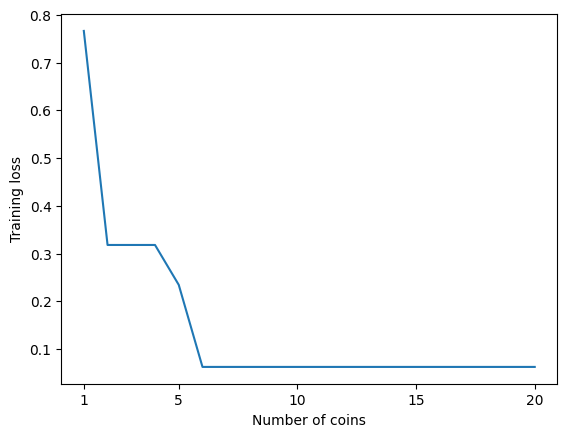

In [20]:
max_coins = 20
n_flips = 5000

coins_list = [np.random.rand() for _ in range(max_coins)]
losses = np.zeros(max_coins)

for i in range(1, max_coins+1):
    # -- we seed the code for reproducing the same sequence of flips
    np.random.seed(random_seed)
    loss, h = ERM(coins_list[:i], n_flips = n_flips)
    losses[i - 1] = loss[0]

plt.plot(losses);
plt.xlabel('Number of coins');
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20]);
plt.ylabel('Training loss');

From the plot above we can see that, when we increase the amount of coins (that is, a larger hypothesis set $H$) we have a higher chance to find better coins that perform well on the training set. Recall, however, that we are interested in obtaining a coin that is sufficiently good also on the test set. In the next section, we will try to see if the best coin we obtain with the ERM procedure is actually good also on the test flips.

---

We now perform additional flips to access the generalization error of our coin and see how it behaves. We first try with very few training and test samples to get a first insight.

In [21]:
max_coins = 10
n_flips = 5

# let's generate a list of random flips
coins_list = [np.random.rand() for _ in range(max_coins)]

# we considered the best coin  (k = 1)
loss, h = ERM(coins_list, n_flips)

print("True coin error probability", h[0])

n_test_flips = 5
test_loss = 0.0

# estimate of the probability through coin flips
for i in range(n_test_flips):
  test_loss += coin_flip(h)

test_loss = test_loss / n_test_flips
print("Train loss", loss[0], ", Test loss", test_loss)

True coin error probability 0.1257153005937821
Train loss 0.0 , Test loss 0.2


Because of the small amount of flips we have made, the ERM procedure selects a coin that actually performs poorly in the test flips. This is due to the fact that we have selected our coin according to a small amount of training samples (i.e. flips), which does not allow to collect a meaningful measure of our coin's performance.


## Generalization error

We finally try to collect an estimate on the generalization error of our best coin by executing additional flips, that is we want we add more test samples. 

Note that here we may have two possible outcomes:

1. The coin returned by the ERM obtains the lowest generalization error among all the coins we have considered, and we have succeded;
2. There is another coin (not usually considered by the ERM) that has a lower generalization error than the best coin: we are in an overfitting scenario. Indeed, the training set of the coin returned by the ERM may be not representative of the true distribution we are considering.

In [22]:
max_coins = 10
coins_list = [np.random.rand() for _ in range(max_coins)]

# -- k = 3: we select the three best coins according to ERM
top_k = 3
loss_k, h_k = ERM(coins_list, n_flips = 1000, top_k = top_k)

# -- compute test losses
n_test_flips = 100
test_losses = np.zeros(top_k)

for i in range(top_k):
  print("True probability of the", i+1, "top-k coin", round(h_k[i], 5))
  for j in range(n_test_flips):
    test_losses[i] += coin_flip(h_k[i])

test_losses = test_losses / n_test_flips

if test_losses[0] == np.min(test_losses): #ERM hypothesis actually has the lowest generalization error
  print("The coin returned by ERM is actually the best, with a test loss of", test_losses[0])
else: #ERM hypothesis is not the best: we are in an overfitting scenario
  print("The", (np.argsort(test_losses)[0] + 1), "coin - with probability", round(h_k[np.argsort(test_losses)[0]], 5),
        "- was found to be better in the test set, with a test loss of", test_losses[np.argsort(test_losses)[0]],
        "( best coin loss is", test_losses[0], ")")

True probability of the 1 top-k coin 0.0742
True probability of the 2 top-k coin 0.11555
True probability of the 3 top-k coin 0.11336
The coin returned by ERM is actually the best, with a test loss of 0.09
